## Comparing entry requirements for Computing courses at Scottish Universities

Scoring system:
- 5 points per A grade
- 3 points per B grade
- 1 point per C grade
- 1 point per qualification

E.g. An entry requirement of AAAB would be 22 (15 points for the A's, 3 points for the B, 4 points for the number of qualifications.

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_excel(r"C:\Users\klc90\my_python_projects\project_women_in_STEM\project_working\data\computing_entry_requirements.xlsx")

In [3]:
df

,HE provider,Course title,Level of study,Entry level,Higher (SE),Essential subjects 1,Level of essential subjects 1,Grade achieved for essential subjects 1,Essential subjects 2,Level of essential subjects 2,Grade achieved for essential subjects 2
0,Abertay University,Computing,BSc (Hons),Standard entry,ABBB,NaN,Higher,NaN,NaN,NaN,NaN
1,Abertay University,Computing,BSc (Hons),Minimum entry,BBB,NaN,Higher,NaN,NaN,NaN,NaN
2,Edinburgh Napier University,Computing,BEng/BEng (Hons),Standard entry,BBBC,Maths and English,National 5,C,NaN,NaN,NaN
3,Edinburgh Napier University,Computing,BEng/BEng (Hons),Minimum entry,CCCC,Maths and English,National 5,C,NaN,NaN,NaN
4,Edinburgh Napier University,Computing Science,BSc/BSc (Hons),Standard entry,BBBB,Maths or Physics,Higher,NaN,Maths and English,National 5,C
5,Edinburgh Napier University,Computing Science,BSc/BSc (Hons),Minimum entry,BBCC,Maths or Physics,Higher,B,Maths and English,National 5,C
6,Edinburgh Napier University,Data Science,BSc (Hons),Standard entry,BBBB,Maths or Physics,Higher,NaN,Maths and English,National 5,C
7,Edinburgh Napier University,Data Science,BSc (Hons),Minimum entry,BBBB,Maths or Physics,Higher,B,Maths and English,National 5,C
8,Glasgow Caledonian University,Computing,BSc (Hons),Standard entry,BBBC,Maths or Computing,Higher,NaN,Maths and English,National 5,C
9,Glasgow Caledonian University,Computing,BSc (Hons),Minimum entry,BBCC,Maths or Computing,Higher,NaN,Maths and English,National 5,C


In [4]:
# 
df["Entry level"].unique()

array(['Standard entry', 'Minimum entry', 'Minimum entry/Widening access',
       nan], dtype=object)

In [5]:
# filter for "Standard entry"
standard_entry = df[df["Entry level"] == "Standard entry"].copy()

In [6]:
# df.words.str.contains(r'he|wo').sum()

standard_entry["Higher (SE)"].str.contains(r"A").sum()

16

In [7]:
### Scoring entry requirements
# Define points per level of qualification
score_a = 5
score_b = 3
score_c = 1

# Define search variables
search_a = "A"
search_b = "B"
search_c = "C"

# Get count per variable, then multiple by score, then total 
standard_entry["count_a"] = standard_entry["Higher (SE)"].str.count(search_a, re.I)
standard_entry["score_a"] = standard_entry["count_a"] * score_a
standard_entry["count_b"] = standard_entry["Higher (SE)"].str.count(search_b, re.I)
standard_entry["score_b"] = standard_entry["count_b"] * score_b
standard_entry["count_c"] = standard_entry["Higher (SE)"].str.count(search_c, re.I)
standard_entry["score_c"] = standard_entry["count_c"] * score_c
standard_entry["qual_count"] = standard_entry["Higher (SE)"].str.len()
standard_entry["total_score"] = standard_entry["score_a"] + standard_entry["score_b"] + standard_entry["score_c"] + standard_entry["qual_count"]

In [8]:
standard_entry.sort_values("total_score", ascending=True)

,HE provider,Course title,Level of study,Entry level,Higher (SE),Essential subjects 1,Level of essential subjects 1,Grade achieved for essential subjects 1,Essential subjects 2,Level of essential subjects 2,Grade achieved for essential subjects 2,count_a,score_a,count_b,score_b,count_c,score_c,qual_count,total_score
42,University of the West of Scotland,Computing Science,BSc (Hons),Standard entry,BBBC,Maths or Computing,Higher,NaN,NaN,NaN,NaN,0,0,3,9,1,1,4,14
2,Edinburgh Napier University,Computing,BEng/BEng (Hons),Standard entry,BBBC,Maths and English,National 5,C,NaN,NaN,NaN,0,0,3,9,1,1,4,14
8,Glasgow Caledonian University,Computing,BSc (Hons),Standard entry,BBBC,Maths or Computing,Higher,NaN,Maths and English,National 5,C,0,0,3,9,1,1,4,14
14,Robert Gordon University,Computer Science,BSc (Hons),Standard entry,BBBC,Maths and English,National 5,C,NaN,NaN,NaN,0,0,3,9,1,1,4,14
4,Edinburgh Napier University,Computing Science,BSc/BSc (Hons),Standard entry,BBBB,Maths or Physics,Higher,NaN,Maths and English,National 5,C,0,0,4,12,0,0,4,16
6,Edinburgh Napier University,Data Science,BSc (Hons),Standard entry,BBBB,Maths or Physics,Higher,NaN,Maths and English,National 5,C,0,0,4,12,0,0,4,16
35,University of Stirling,Data Science,BSc (Hons),Standard entry,ABBB,At S5,NaN,NaN,NaN,NaN,NaN,1,5,3,9,0,0,4,18
33,University of Stirling,Computing Science,BSc (Hons),Standard entry,ABBB,At S5,NaN,NaN,NaN,NaN,NaN,1,5,3,9,0,0,4,18
0,Abertay University,Computing,BSc (Hons),Standard entry,ABBB,NaN,Higher,NaN,NaN,NaN,NaN,1,5,3,9,0,0,4,18
12,Heriot-Watt University,Computer Science (Data Science),BSc (Hons),Standard entry,ABBB,Maths,Higher,NaN,NaN,NaN,NaN,1,5,3,9,0,0,4,18


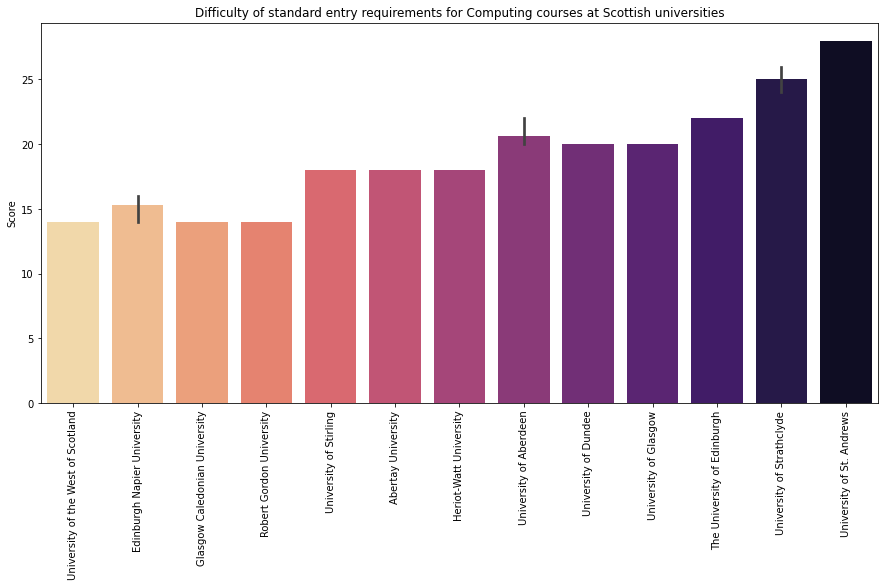

In [12]:
plt.figure(figsize=(15, 7))
sns.barplot(x="HE provider", y="total_score", palette="magma_r", data=standard_entry.sort_values("total_score", ascending=True))
plt.xticks(rotation=90)
plt.ylabel("Score")
plt.xlabel("")
plt.title("Difficulty of standard entry requirements for Computing courses at Scottish universities")
plt.show()

Some universities offer multiple computing courses hence why GCU, UoA, and UoS have had their score averaged.

ENU, GCU, and AU have the highest number of Computing students of all the universities. They also have the lowest entry standard entry requirements (see above). 

Females typically outperform their male classmates so could theoretically apply for any of these courses and be accepted. However, even if they are getting the grades, they may not apply to computing for various reasons including:
- Not being exposed to computing at school 
- Not being encouraged to pursue computing/tech when applying to universities
- Viewing it as a difficult subject even though they enjoy it
- Viewing it as a male-dominated subject